In [36]:
# 1. Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [37]:
# 2. Load the dataset
df = pd.read_csv("../data/encoded_mr75609filt_version4.csv")  # encoded version

In [38]:
# 3. Drop the 'datetime' column 
df = df.drop(['datetime', 'PatientID'], axis=1)

In [39]:
# 4. Prepare features (X) and targets (y)
# Assuming 'BodyPart' and 'sourceID' have already been numerically encoded.
# Drop 'BodyPart' and 'sourceID' from X because they are the target variables.
X = df.drop(['BodyPart', 'sourceID'], axis=1)

# Targets
y_bodypart = df['BodyPart']  # Target for BodyPart prediction
y_sourceid = df['sourceID']  # Target for sourceID prediction

In [40]:
# Create an imputer to fill NaN values with the mean of the columns
imputer = SimpleImputer(strategy='mean')

In [41]:
# Apply imputation to the features (X)
X_imputed = imputer.fit_transform(X)

In [42]:
# 5. Split data into train and test sets

# Splitting the data for BodyPart
X_train_bp, X_test_bp, y_train_bp, y_test_bp = train_test_split(X_imputed, y_bodypart, test_size=0.2, random_state=42)

# Splitting the data for SourceID
X_train_sid, X_test_sid, y_train_sid, y_test_sid = train_test_split(X_imputed, y_sourceid, test_size=0.2, random_state=42)


In [43]:
# 6. Train models
# For BodyPart prediction
bodypart_model = RandomForestClassifier(random_state=42)
bodypart_model.fit(X_train_bp, y_train_bp)

# For sourceID prediction
sourceid_model = RandomForestClassifier(random_state=42)
sourceid_model.fit(X_train_sid, y_train_sid)

RandomForestClassifier(random_state=42)

In [50]:
# 7. Make predictions
# Predictions for BodyPart
y_pred_bp = bodypart_model.predict(X_test_bp)

# Predictions for sourceID
y_pred_sid = sourceid_model.predict(X_test_sid)

# Get predictions for the test data
bodypart_predictions = bodypart_model.predict(X_test_bp)
sourceid_predictions = sourceid_model.predict(X_test_sid)

# Print predictions
print("Predicted BodyPart values:", bodypart_predictions)
print("Predicted sourceID values:", sourceid_predictions)

Predicted BodyPart values: [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  8  0  0  0  0  0  0
  0  0  0  0  0 14  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
Predicted sourceID values: [ 5  6  3  5  0  5  5  5  5  3  5  3  6  3  1  5 10  0  5  1  4 10  4  5
 10  1  1  6  8  5  5  4  9  4  5  4  5  6  6  5  5  5  0  5  4  3  1  3
  1  4  7 10  1  

In [45]:
# 8. Evaluate the models
# Accuracy for BodyPart model
bp_accuracy = accuracy_score(y_test_bp, y_pred_bp)
print("BodyPart Model Accuracy:", bp_accuracy)

# Accuracy for sourceID model
sid_accuracy = accuracy_score(y_test_sid, y_pred_sid)
print("sourceID Model Accuracy:", sid_accuracy)

BodyPart Model Accuracy: 0.9766536964980544
sourceID Model Accuracy: 0.36186770428015563


In [46]:
# 9. Feature Importance (to see which features are most important)
importances_bp = bodypart_model.feature_importances_
importances_sid = sourceid_model.feature_importances_

import matplotlib.pyplot as plt

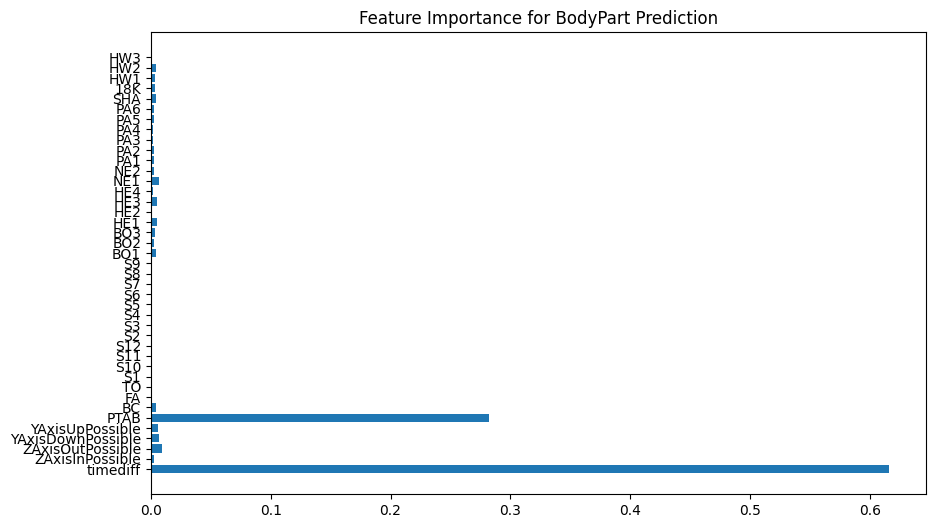

In [47]:
# For BodyPart
plt.figure(figsize=(10,6))
plt.barh(X.columns, importances_bp)
plt.title("Feature Importance for BodyPart Prediction")
plt.show()

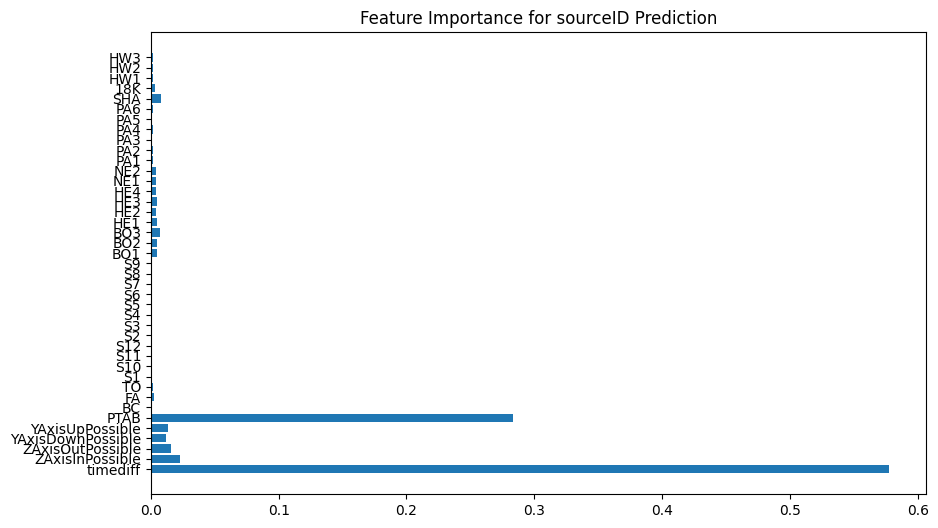

In [48]:
# For sourceID
plt.figure(figsize=(10,6))
plt.barh(X.columns, importances_sid)
plt.title("Feature Importance for sourceID Prediction")
plt.show()